In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(ggplot2)
library(dplyr)
library(gridExtra)
library(base)
library(stringr)
library(Hmisc)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: lattice

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: survival

  res = super(Function, self).__call_

In [4]:
%%R
PR = read.table("data/58A2r_97_otus_new_filtered_hits_coverage.txt", header = FALSE)
PF = read.table("data/nBITS2f_97_otus_new_filtered_hits_coverage.txt", header = FALSE)

In [5]:
%%R
head(PR)

                                           V1
1              0,"k__fungi,"k__fungi,9,0.7778
2            0,K__fungi,K__fungi,55382,0.8618
3 0,K__unidentified,K__unidentified,13,0.7692
4       1,"k__fungi,P__basidiomycota,1,1.0000
5          1,"k__fungi,P__ascomycota,6,1.0000
6        1,"k__fungi,P__unidentified,2,0.0000


In [6]:
%%R
PR$V1 = as.character(PR$V1)
PR2 = str_split_fixed(PR$V1, ",", 5)
PR2 = as.data.frame(PR2)
head(PR2)

  V1              V2               V3    V4     V5
1  0       "k__fungi        "k__fungi     9 0.7778
2  0        K__fungi         K__fungi 55382 0.8618
3  0 K__unidentified  K__unidentified    13 0.7692
4  1       "k__fungi P__basidiomycota     1 1.0000
5  1       "k__fungi    P__ascomycota     6 1.0000
6  1       "k__fungi  P__unidentified     2 0.0000


In [7]:
%%R
colnames(PR2) = c("tax_level", "first_tax", "tax_rep", "seq_num", "percent")
head(PR2)
PR2$tax_level = as.numeric(as.character(PR2$tax_level))
PR2$seq_num = as.numeric(as.character(PR2$seq_num))
PR2$percent = as.numeric(as.character(PR2$percent))
head(PR2)

  tax_level       first_tax          tax_rep seq_num percent
1         0       "k__fungi        "k__fungi       9  0.7778
2         0        K__fungi         K__fungi   55382  0.8618
3         0 K__unidentified  K__unidentified      13  0.7692
4         1       "k__fungi P__basidiomycota       1  1.0000
5         1       "k__fungi    P__ascomycota       6  1.0000
6         1       "k__fungi  P__unidentified       2  0.0000


In [8]:
%%R
PR2$tax = gsub("k__", "", PR2$tax_rep)
PR2$tax = gsub("K__", "", PR2$tax_rep)
PR2$tax = gsub("P__", "", PR2$tax_rep)
PR2$tax = as.character(PR2$tax)
head(PR2)

  tax_level       first_tax          tax_rep seq_num percent             tax
1         0       "k__fungi        "k__fungi       9  0.7778       "k__fungi
2         0        K__fungi         K__fungi   55382  0.8618        K__fungi
3         0 K__unidentified  K__unidentified      13  0.7692 K__unidentified
4         1       "k__fungi P__basidiomycota       1  1.0000   basidiomycota
5         1       "k__fungi    P__ascomycota       6  1.0000      ascomycota
6         1       "k__fungi  P__unidentified       2  0.0000    unidentified


In [9]:
%%R
str(PR2)

'data.frame':	60 obs. of  6 variables:
 $ tax_level: num  0 0 0 1 1 1 1 1 1 1 ...
 $ first_tax: Factor w/ 3 levels "\"k__fungi","K__fungi",..: 1 2 3 1 1 1 2 2 2 2 ...
 $ tax_rep  : Factor w/ 51 levels "C__agaricomycetes",..: 38 39 40 42 41 50 41 42 51 44 ...
 $ seq_num  : num  9 55382 13 1 6 ...
 $ percent  : num  0.778 0.862 0.769 1 1 ...
 $ tax      : chr  "\"k__fungi" "K__fungi" "K__unidentified" "basidiomycota" ...


In [10]:
%%R
PR3 = filter(PR2, tax_level == 1)
PR3 = filter(PR3, seq_num > 13) 

In [11]:
%%R
PR3$realper = PR3$percent *100
PR3$tax = capitalize(PR3$tax)

In [15]:
%%R
(PR3$percent)

 [1] 0.9261 0.8732 0.8336 0.6582 0.0413 0.9667 0.8661 1.0000 0.7867 0.4915


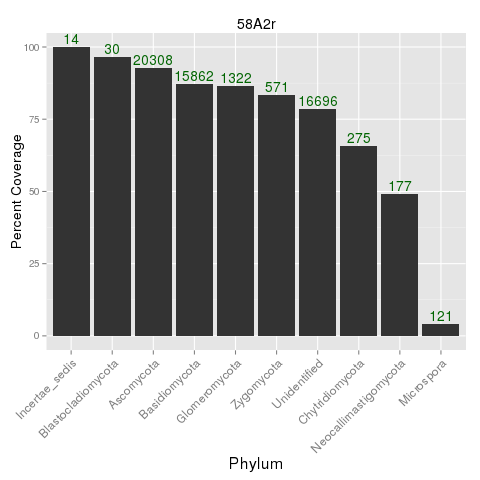

In [230]:
%%R
PR3$tax <- factor(PR3$tax, levels = PR3$tax[order(-PR3$percent)])
p = ggplot(PR3, aes(x = tax, y = as.numeric(as.character(realper)))) +
geom_histogram(stat= "identity")

p = p + theme(axis.title.x = element_text(size=16), axis.title.y = element_text(size = 14),
           axis.text.x  = element_text(angle=45, vjust=1, hjust =1, size=12))

p = p +  geom_text(aes(label=seq_num, vjust=-0.3), color = "dark green")

p = p + xlab("Phylum") + ylab("Percent Coverage") + ggtitle("58A2r")

p 

In [231]:
%%R
ggsave(filename = "data/figs/58A2r.pdf", plot = p, width = 7, height = 7)

In [16]:
%%R
PF$V1 = as.character(PF$V1)
PF2 = str_split_fixed(PF$V1, ",", 5)
PF2 = as.data.frame(PF2)
head(PF2)

  V1              V2               V3    V4     V5
1  0       "k__fungi        "k__fungi     9 0.2222
2  0        K__fungi         K__fungi 55382 0.5221
3  0 K__unidentified  K__unidentified    13 0.2308
4  1       "k__fungi P__basidiomycota     1 0.0000
5  1       "k__fungi    P__ascomycota     6 0.3333
6  1       "k__fungi  P__unidentified     2 0.0000


In [17]:
%%R
colnames(PF2) = c("tax_level", "first_tax", "tax_rep", "seq_num", "percent")
head(PF2)
PF2$tax_level = as.numeric(as.character(PF2$tax_level))
PF2$seq_num = as.numeric(as.character(PF2$seq_num))
PF2$percent = as.numeric(as.character(PF2$percent))
head(PF2)

  tax_level       first_tax          tax_rep seq_num percent
1         0       "k__fungi        "k__fungi       9  0.2222
2         0        K__fungi         K__fungi   55382  0.5221
3         0 K__unidentified  K__unidentified      13  0.2308
4         1       "k__fungi P__basidiomycota       1  0.0000
5         1       "k__fungi    P__ascomycota       6  0.3333
6         1       "k__fungi  P__unidentified       2  0.0000


In [18]:
%%R
PF2$tax = gsub("k__", "", PF2$tax_rep)
PF2$tax = gsub("K__", "", PF2$tax_rep)
PF2$tax = gsub("P__", "", PF2$tax_rep)
PF2$tax = as.character(PF2$tax)
head(PF2)

  tax_level       first_tax          tax_rep seq_num percent             tax
1         0       "k__fungi        "k__fungi       9  0.2222       "k__fungi
2         0        K__fungi         K__fungi   55382  0.5221        K__fungi
3         0 K__unidentified  K__unidentified      13  0.2308 K__unidentified
4         1       "k__fungi P__basidiomycota       1  0.0000   basidiomycota
5         1       "k__fungi    P__ascomycota       6  0.3333      ascomycota
6         1       "k__fungi  P__unidentified       2  0.0000    unidentified


In [19]:
%%R
PF3 = filter(PF2, tax_level == 1)
PF3 = filter(PF3, seq_num > 13) 

In [20]:
%%R
PF3$realper = PF3$percent *100
PF3$tax = capitalize(PF3$tax)

In [21]:
%%R
PF3$tax <- factor(PF3$tax, levels = PF3$tax[order(-PF3$percent)])
p = ggplot(PF3, aes(x = tax, y = as.numeric(as.character(realper)))) +
geom_histogram(stat= "identity")

p = p + theme(axis.title.x = element_text(size=16), axis.title.y = element_text(size = 14),
           axis.text.x  = element_text(angle=45, vjust=1, hjust =1, size=12))

p = p +  geom_text(aes(label=seq_num, vjust=-0.3), color = "dark green")

p = p + xlab("Phylum") + ylab("Percent Coverage") + ggtitle("nBITSf")

p = p + expand_limits(y=c(0,100))

p 


Error: Unknown parameters: binwidth, bins, origin, right


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error: Unknown parameters: binwidth, bins, origin, right

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [233]:
%%R
ggsave(filename = "data/figs/nBITSf.pdf", plot = p, width = 7, height = 7)

In [205]:
%%R
PF3$primer = "nBITSf"
PR3$primer = "58A2r"
total = rbind(PF3, PR3)

In [206]:
%%R
total

   tax_level first_tax                  tax_rep seq_num percent
1          1  K__fungi            P__ascomycota   20308  0.4559
2          1  K__fungi         P__basidiomycota   15862  0.4869
3          1  K__fungi            P__zygomycota     571  0.4834
4          1  K__fungi       P__chytridiomycota     275  0.3055
5          1  K__fungi            P__microspora     121  0.3471
6          1  K__fungi    P__blastocladiomycota      30  0.5667
7          1  K__fungi         P__glomeromycota    1322  0.7716
8          1  K__fungi        P__incertae_sedis      14  0.5714
9          1  K__fungi          P__unidentified   16696  0.6224
10         1  K__fungi P__neocallimastigomycota     177  0.5198
11         1  K__fungi            P__ascomycota   20308  0.9261
12         1  K__fungi         P__basidiomycota   15862  0.8732
13         1  K__fungi            P__zygomycota     571  0.8336
14         1  K__fungi       P__chytridiomycota     275  0.6582
15         1  K__fungi            P__mic

In [221]:
%%R
total$newpercent = ((total$seq_num * total$percent)  / sum((total$seq_num)/ 2) *100)

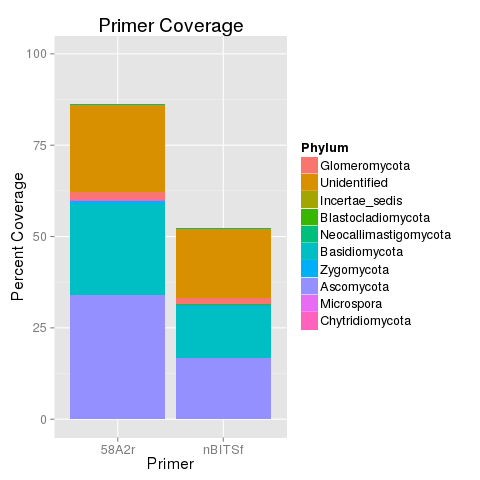

In [236]:
%%R
p = ggplot(total, aes(x= primer, y = newpercent, fill=tax)) + geom_bar(stat= "identity")

p = p + xlab("Primer") + ylab("Percent Coverage") + ggtitle("Primer Coverage")

p = p + expand_limits(y=c(0,100)) + scale_fill_discrete(name = "Phylum") + theme(text = element_text(size=16)) 


p

In [237]:
%%R
ggsave(filename = "data/figs/Primer_coverage.pdf", plot = p, width = 7, height = 7)